## Advent of Code

Each garden plot grows only a single type of plant and is indicated by a single letter on your map. When multiple garden plots are growing the same type of plant and are touching (horizontally or vertically), they form a region. For example:

In [ ]:
import sys
sys.path.append('..')
from utils import *

inp = get_data(day=12, year=2024)
samp = '''AAAA
BBCD
BBCC
EEEC'''
print(samp)

AAAA
BBCD
BBCC
EEEC


This 4x4 arrangement includes garden plots growing five different types of plants (labeled A, B, C, D, and E), each grouped into their own region.

In order to accurately calculate the cost of the fence around a single region, you need to know that region's area and perimeter.

The area of a region is simply the number of garden plots the region contains. The above map's type A, B, and C plants are each in a region of area 4. The type E plants are in a region of area 3; the type D plants are in a region of area 1.

Each garden plot is a square and so has four sides. The perimeter of a region is the number of sides of garden plots in the region that do not touch another garden plot in the same region. The type A and C plants are each in a region with perimeter 10. The type B and E plants are each in a region with perimeter 8. The lone D plot forms its own region with perimeter 4.

Visually indicating the sides of plots in each region that contribute to the perimeter using - and |, the above map's regions' perimeters are measured as follows:
```
+-+-+-+-+
|A A A A|
+-+-+-+-+     +-+
              |D|
+-+-+   +-+   +-+
|B B|   |C|
+   +   + +-+
|B B|   |C C|
+-+-+   +-+ +
          |C|
+-+-+-+   +-+
|E E E|
+-+-+-+
```
Plants of the same type can appear in multiple separate regions, and regions can even appear within other regions. For example:

In [ ]:
samp2 = '''OOOOO
OXOXO
OOOOO
OXOXO
OOOOO'''
print(samp2)

OOOOO
OXOXO
OOOOO
OXOXO
OOOOO


The above map contains five regions, one containing all of the O garden plots, and the other four each containing a single X plot.

The four X regions each have area 1 and perimeter 4. The region containing 21 type O plants is more complicated; in addition to its outer edge contributing a perimeter of 20, its boundary with each X region contributes an additional 4 to its perimeter, for a total perimeter of 36.

Due to "modern" business practices, the price of fence required for a region is found by multiplying that region's area by its perimeter. The total price of fencing all regions on a map is found by adding together the price of fence for every region on the map.

In the first example, region A has price 4 * 10 = 40, region B has price 4 * 8 = 32, region C has price 4 * 10 = 40, region D has price 1 * 4 = 4, and region E has price 3 * 8 = 24. So, the total price for the first example is 140.

In the second example, the region with all of the O plants has price 21 * 36 = 756, and each of the four smaller X regions has price 1 * 4 = 4, for a total price of 772 (756 + 4 + 4 + 4 + 4).

Here's a larger example:

In [ ]:
samp3 = '''RRRRIICCFF
RRRRIICCCF
VVRRRCCFFF
VVRCCCJFFF
VVVVCJJCFE
VVIVCCJJEE
VVIIICJJEE
MIIIIIJJEE
MIIISIJEEE
MMMISSJEEE'''
print(samp3)

RRRRIICCFF
RRRRIICCCF
VVRRRCCFFF
VVRCCCJFFF
VVVVCJJCFE
VVIVCCJJEE
VVIIICJJEE
MIIIIIJJEE
MIIISIJEEE
MMMISSJEEE


It contains:

- A region of R plants with price 12 * 18 = 216.
- A region of I plants with price 4 * 8 = 32.
- A region of C plants with price 14 * 28 = 392.
- A region of F plants with price 10 * 18 = 180.
- A region of V plants with price 13 * 20 = 260.
- A region of J plants with price 11 * 20 = 220.
- A region of C plants with price 1 * 4 = 4.
- A region of E plants with price 13 * 18 = 234.
- A region of I plants with price 14 * 22 = 308.
- A region of M plants with price 5 * 12 = 60.
- A region of S plants with price 3 * 8 = 24.

So, it has a total price of 1930.

What is the total price of fencing all regions on your map?

In [ ]:
xs = samp.splitlines()
xs

['AAAA', 'BBCD', 'BBCC', 'EEEC']

I'd like to convert the xs list into a numpy two-dimensional matrix. How can I do that?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You can convert the list of strings into a 2D numpy array like this:

```python
import numpy as np
grid = np.array([list(row) for row in xs])
```

This uses a list comprehension to convert each string into a list of characters, then wraps it all in `np.array()`.

Would you like to try that and see what it looks like?

In [ ]:
from numpy import array

def _m(txt):
    return array([[ord(c) - ord('A') + 1 for c in line] for line in txt.splitlines()])

m = _m(samp)
m

array([[1, 1, 1, 1],
       [2, 2, 3, 4],
       [2, 2, 3, 3],
       [5, 5, 5, 3]])

In [ ]:
m[0,2]

np.int64(1)

I'd like to plot the numpy array and use different colors for different values, how can I do that?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You can use `plt.imshow()` to visualize the array with different colors for different values:

```python
plt.imshow(m, cmap='tab10')
plt.colorbar()
plt.show()
```

The `cmap='tab10'` gives you distinct colors for different integer values. Would you like to try that?

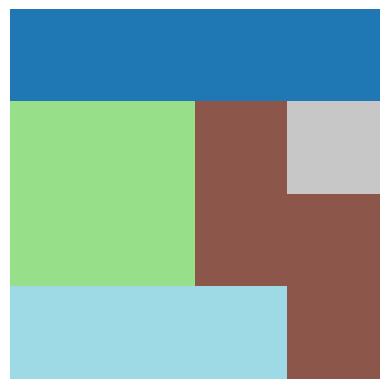

In [ ]:
import matplotlib.pyplot as plt

def show(m):
    plt.imshow(m, cmap='tab20')
    plt.axis('off')
    plt.show()

show(m)

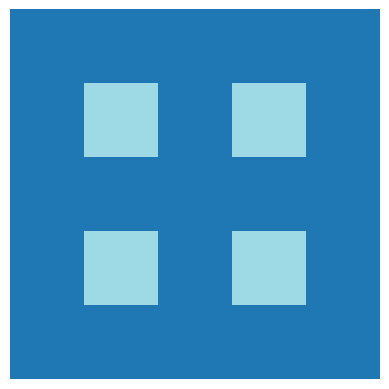

In [ ]:
show(_m(samp2))

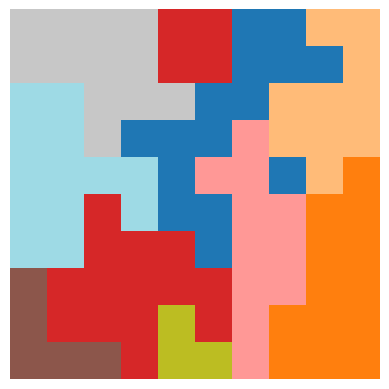

In [ ]:
show(_m(samp3))

In [ ]:
m

array([[1, 1, 1, 1],
       [2, 2, 3, 4],
       [2, 2, 3, 3],
       [5, 5, 5, 3]])

How can I do flood-fill on the numpy array? Is there a library function for that?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

There isn't a built-in numpy function for flood-fill, but `scipy.ndimage.label` can identify connected regions for you! It's perfect for this problem.

```python
from scipy.ndimage import label
```

The `label` function will find all connected components. You'd need to call it separately for each plant type, or you can use it with a structure parameter to define what "connected" means (4-connectivity vs 8-connectivity).

Would you like to see how to use it, or would you prefer to explore the documentation first?

Please show me how to use it for 4-connectivity

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

For 4-connectivity (horizontal and vertical neighbors only), you need to specify a structure that excludes diagonals:

```python
structure = [[0,1,0], [1,1,1], [0,1,0]]
labeled, num_features = label(m == 1, structure=structure)
```

This finds all connected regions where `m == 1` (all the 'A' plots). The `labeled` array will have a different number for each separate region, and `num_features` tells you how many regions were found.

Try it out! What do you get for the 'A' region?

In [ ]:
from scipy.ndimage import label

res, _ = label(m==2)
res

array([[0, 0, 0, 0],
       [1, 1, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 0, 0]], dtype=int32)

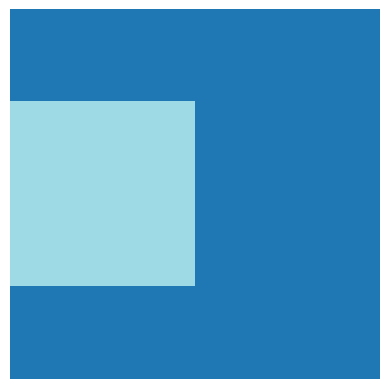

In [ ]:
show(res)

In [ ]:
m2 = _m(samp2)
m2
res2, _ = label(m2==24)
res2

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 2, 0],
       [0, 0, 0, 0, 0],
       [0, 3, 0, 4, 0],
       [0, 0, 0, 0, 0]], dtype=int32)

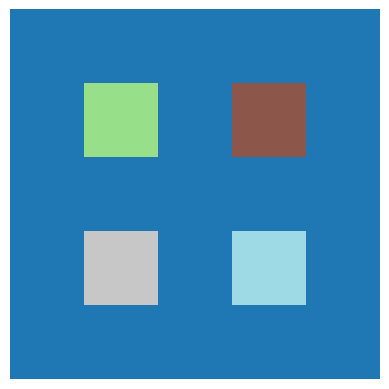

In [ ]:
show(res2)

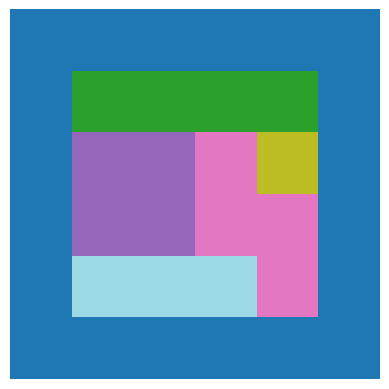

In [ ]:
import numpy as np

m_pad = np.pad(m, 1)
show(m_pad)

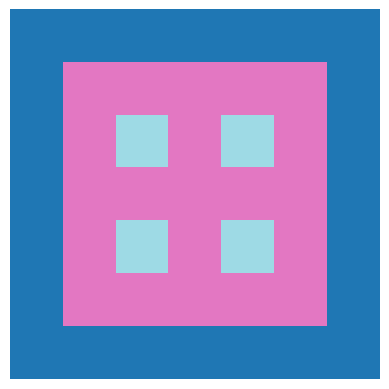

In [ ]:
m2_pad = np.pad(m2, 1)
show(m2_pad)

In [ ]:

m2_pad

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0, 15, 15, 15, 15, 15,  0],
       [ 0, 15, 24, 15, 24, 15,  0],
       [ 0, 15, 15, 15, 15, 15,  0],
       [ 0, 15, 24, 15, 24, 15,  0],
       [ 0, 15, 15, 15, 15, 15,  0],
       [ 0,  0,  0,  0,  0,  0,  0]])

In [ ]:
res2, _ = label(m2_pad==24)
res2

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)

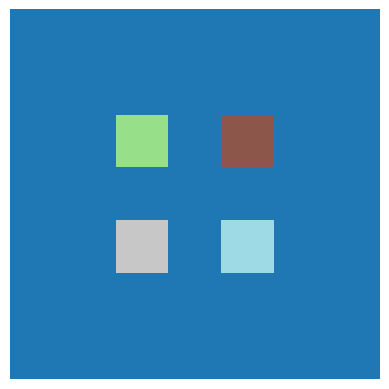

In [ ]:
show(res2)

In [ ]:
res2==1

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False,  True, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

In [ ]:
res2

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [ ]:
x = res2[2]
x

array([0, 0, 1, 0, 2, 0, 0], dtype=int32)

Idea: generate from values different components

How can I easily find all the components? I want change their identifiers - each component should have unique id.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

To find all components across the entire grid (not just one plant type), you can label the entire array at once by creating a custom equality function, or loop through each unique value. Here's a simple approach:

```python
components = []
comp_id = 1
result = np.zeros_like(m_pad)

for plant_type in np.unique(m_pad):
    if plant_type == 0: continue  # skip padding
    labeled, num = label(m_pad == plant_type)
    for region_id in range(1, num + 1):
        mask = labeled == region_id
        result[mask] = comp_id
        components.append((plant_type, comp_id))
        comp_id += 1
```

This gives each region a unique ID across all plant types. Would you like to try implementing this?

In [ ]:
def _components(m_pad):
    # components = []
    comp_id = 1
    result = np.zeros_like(m_pad)

    for plant_type in np.unique(m_pad):
        if plant_type == 0: continue  # skip padding
        labeled, num = label(m_pad == plant_type)
        for region_id in range(1, num + 1):
            mask = labeled == region_id
            result[mask] = comp_id
            # components.append((plant_type, comp_id))
            comp_id += 1

    return result

_components(m_pad)

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0],
       [0, 2, 2, 3, 4, 0],
       [0, 2, 2, 3, 3, 0],
       [0, 5, 5, 5, 3, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
_components(m2_pad)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 2, 1, 3, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 4, 1, 5, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0]])

Counting perimeters - idea - use XOR operation.

In [ ]:
x[1:], x[:-1]

(array([0, 1, 0, 2, 0, 0], dtype=int32),
 array([0, 0, 1, 0, 2, 0], dtype=int32))

In [ ]:
x[1:] ^ x[:-1]

array([0, 1, 1, 2, 2, 0], dtype=int32)

In [ ]:
(x[1:] ^ x[:-1]).sum()

np.int64(6)

In [ ]:
def cnt_edges(x):
    return (x[1:] ^ x[:-1]).sum()
cnt_edges(x)

np.int64(6)

In [ ]:
res2==1

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False,  True, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

In [ ]:
cnt_edges(res2==1)

np.int64(2)

In [ ]:
m_pad

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0],
       [0, 2, 2, 3, 4, 0],
       [0, 2, 2, 3, 3, 0],
       [0, 5, 5, 5, 3, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
m_pad==1

array([[False, False, False, False, False, False],
       [False,  True,  True,  True,  True, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [ ]:
cnt_edges(m_pad==1)

np.int64(8)

In [ ]:
(m_pad==1)[1]

array([False,  True,  True,  True,  True, False])

In [ ]:
cnt_edges((m_pad==1)[1])

np.int64(2)

How can I map a function to all rows of the matrix?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You can use `np.apply_along_axis` to apply a function to all rows:

```python
np.apply_along_axis(cnt_edges, axis=1, arr=m_pad==1)
```

The `axis=1` means apply along rows. This will return an array with one result per row.

Give it a try!

In [ ]:
np.apply_along_axis(cnt_edges, axis=1, arr=m_pad==1)

array([0, 2, 0, 0, 0, 0])

In [ ]:
np.apply_along_axis(cnt_edges, axis=0, arr=m_pad==1)

array([0, 2, 2, 2, 2, 0])

In [ ]:
np.apply_along_axis(cnt_edges, axis=0, arr=m_pad==1).sum()


np.int64(8)

In [ ]:
def _perimeter(x):
    return L(0, 1).map(lambda i: np.apply_along_axis(cnt_edges, axis=i, arr=x).sum()).sum()
    
_perimeter(m_pad==1)

np.int64(10)

In [ ]:
def _price(x):
    return _perimeter(x) * x.sum()

_price(m_pad==1)

np.int64(40)

In [ ]:
def solve(txt):
    m = np.pad(_m(txt), 1)
    m_comp = _components(m)
    cids = L(np.unique(m_comp).tolist()).filter(lambda o: o != 0)
    ps = cids.map(lambda x: m_comp==x).map(_price)
    return ps.sum()

solve(samp)

np.int64(140)

In [ ]:
solve(samp2)

np.int64(772)

In [ ]:
solve(samp3)

np.int64(1930)

In [ ]:
solve(inp)

np.int64(1363484)

# Part 2

Idea: Find the number of corners for each component - this number will be the same as the number of sides. Use 2x2 kernels to do that.

In [ ]:
m_pad

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0],
       [0, 2, 2, 3, 4, 0],
       [0, 2, 2, 3, 3, 0],
       [0, 5, 5, 5, 3, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
masked = np.where(m_pad == 3, 1, 0)
masked

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

I want match specific pattern, like `[[0,0],[0,1]]`. How can I do that?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You can use a sliding window approach with array slicing to check for 2x2 patterns. Here's a compact way:

```python
pattern = np.array([[0,0],[0,1]])
matches = (masked[:-1, :-1] == pattern[0,0]) & (masked[:-1, 1:] == pattern[0,1]) & \
          (masked[1:, :-1] == pattern[1,0]) & (masked[1:, 1:] == pattern[1,1])
```

This creates a boolean array showing where the pattern matches. You can count matches with `matches.sum()`.

Want to try it out?

In [ ]:
pattern = np.array([[0,0],[0,1]])
matches = (masked[:-1, :-1] == pattern[0,0]) & (masked[:-1, 1:] == pattern[0,1]) & \
          (masked[1:, :-1] == pattern[1,0]) & (masked[1:, 1:] == pattern[1,1])
matches

array([[False, False, False, False, False],
       [False, False,  True, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [ ]:
masked[:-1, :-1]

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 0, 1]])

In [ ]:
def _pattern_cnt(pattern, masked):
    occ = (masked[:-1, :-1] == pattern[0,0]) & (masked[:-1, 1:] == pattern[0,1]) & \
          (masked[1:, :-1] == pattern[1,0]) & (masked[1:, 1:] == pattern[1,1])
    return occ.sum()
_pattern_cnt(np.array([[0,0],[0,1]]), masked)

np.int64(1)

In [ ]:
_pattern_cnt(np.array([[0,0],[1,0]]), masked)

np.int64(2)

In [ ]:
# These count as 1 corner:
pat1 = [
    np.array([[1,1],[1,0]]),
    np.array([[1,1],[0,1]]),
    np.array([[1,0],[1,1]]),
    np.array([[0,1],[1,1]]),
    np.array([[0,0],[1,0]]),
    np.array([[0,0],[0,1]]),
    np.array([[1,0],[0,0]]),
    np.array([[0,1],[0,0]]),
]
# These count as 2 corners:
pat2 = [
    np.array([[0,1],[1,0]]),
    np.array([[1,0],[0,1]]),
]



In [ ]:
L(pat1).map(_pattern_cnt, masked=masked).sum()

np.int64(8)

In [ ]:
def _sides(masked):
    c1 = L(pat1).map(_pattern_cnt, masked=masked).sum()
    c2 = L(pat2).map(_pattern_cnt, masked=masked).sum()
    return c1 + 2*c2
_sides(masked)

np.int64(8)

In [ ]:
def _mask(c, m): return np.where(m == c, 1, 0)
_mask(3, m_pad)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
def _price2(m): return _sides(m) * m.sum()
_price2(m_pad)

np.int64(86)

In [ ]:
def solve_part2(txt):
    m = np.pad(_m(txt), 1)
    m_comp = _components(m)
    cids = L(np.unique(m_comp).tolist()).filter(lambda o: o != 0)
    ps = cids.map(_mask, m=m_comp).map(_price2)
    return ps.sum()

solve_part2(samp)

np.int64(80)

In [ ]:
samp_e = '''EEEEE
EXXXX
EEEEE
EXXXX
EEEEE'''

solve_part2(samp_e)

np.int64(236)

In [ ]:
samp_last = '''AAAAAA
AAABBA
AAABBA
ABBAAA
ABBAAA
AAAAAA'''
solve_part2(samp_last)

np.int64(368)

In [ ]:
solve_part2(inp)

np.int64(838988)